In [27]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

In [28]:
label = LabelEncoder()
df = pd.read_excel("data/Raisin.xlsx");
df['Class'] = label.fit_transform(df['Class']);

df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [29]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Text(0.5, 1.0, 'raisin type')

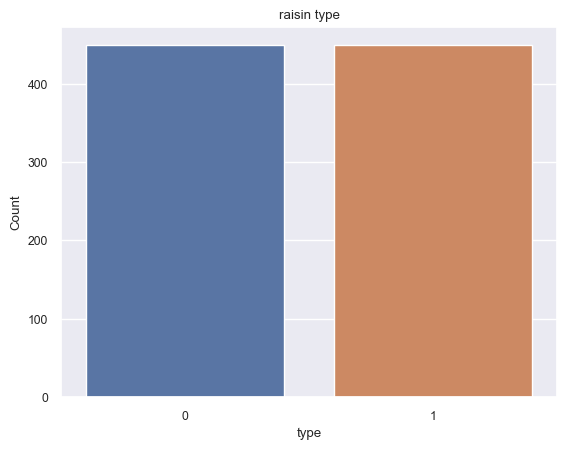

In [30]:
sns.countplot(data = df, x="Class")
plt.xlabel("type")
plt.ylabel("Count")
plt.title("raisin type")

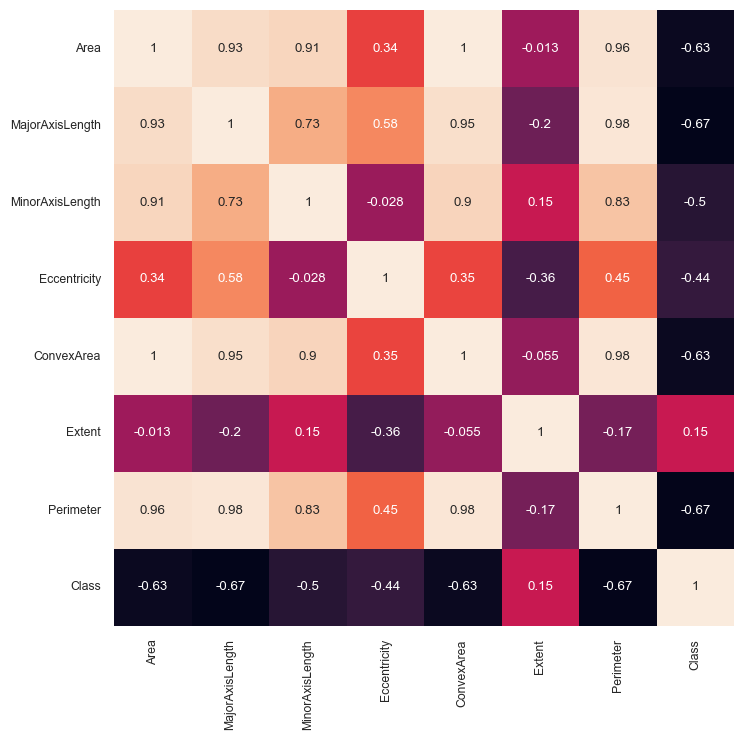

In [31]:
df_corr = df.corr()

plt.figure(figsize=(8, 8))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [32]:
X = df.iloc[:,:7].values
y = df.iloc[:,-1].values

In [33]:
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, ...,
        9.05460000e+04, 7.58650579e-01, 1.18404000e+03],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, ...,
        7.87890000e+04, 6.84129570e-01, 1.12178600e+03],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, ...,
        9.37170000e+04, 6.37612812e-01, 1.20857500e+03],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, ...,
        1.06264000e+05, 7.41098519e-01, 1.29282800e+03],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, ...,
        9.76530000e+04, 6.58798253e-01, 1.25854800e+03],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, ...,
        8.91970000e+04, 6.32019963e-01, 1.27286200e+03]])

In [34]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [36]:
import numpy as np

mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)


X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [37]:
X_train

array([[-0.6548812 , -0.78812672, -0.38730055, ..., -0.65224802,
         0.23753637, -0.71404437],
       [-1.00293785, -1.35563187, -0.54502864, ..., -1.00956114,
        -0.58197907, -1.13149817],
       [-0.93428768, -0.98454723, -0.86018782, ..., -0.92403154,
         0.19911415, -0.99769926],
       ...,
       [-0.10971045,  0.10379878, -0.20874035, ..., -0.04391002,
        -0.26892835,  0.28777656],
       [ 1.34597299,  0.82730363,  1.88169876, ...,  1.33404467,
        -0.11791121,  1.16198015],
       [ 0.02459276,  0.21301716,  0.00791686, ...,  0.05788717,
         0.70180368,  0.18085058]])

In [38]:
from tensorflow.python.keras.utils import np_utils

y_train = np_utils.to_categorical(y_train,2)
y_test = np_utils.to_categorical(y_test,2)

print('New y_train shape: ', y_train.shape)
print('New y_train shape: ', y_test.shape)

New y_train shape:  (720, 2)
New y_train shape:  (180, 2)


In [39]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [83]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense
from keras.optimizers import Adam


model=Sequential()
model.add(SimpleRNN(16, activation="relu", input_shape=(7,1)))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(Adam(learning_rate=0.01),'binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_17 (SimpleRNN)   (None, 16)                288       
                                                                 
 dense_23 (Dense)            (None, 8)                 136       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_24 (Dense)            (None, 2)                 18        
                                                                 
Total params: 442 (1.73 KB)
Trainable params: 442 (1.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/100
23/23 [==============================] - 4s 28ms/step - loss: 0.5330 - accuracy: 0.8000 - val_loss: 0.3522 - val_accuracy: 0.9056
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4353 - accuracy: 0.8264 - val_loss: 0.3689 - val_accuracy: 0.8944
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4135 - accuracy: 0.8417 - val_loss: 0.3349 - val_accuracy: 0.9000
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3840 - accuracy: 0.8500 - val_loss: 0.3369 - val_accuracy: 0.8833
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3786 - accuracy: 0.8556 - val_loss: 0.3342 - val_accuracy: 0.9000
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3859 - accuracy: 0.8417 - val_loss: 0.3448 - val_accuracy: 0.8944
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3697 - accuracy: 0.8486 - val_loss: 0.3348 - val_accuracy: 0.9000
Epoch 8/100


Epoch 59/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3314 - accuracy: 0.8583 - val_loss: 0.3557 - val_accuracy: 0.8889
Epoch 60/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3442 - accuracy: 0.8583 - val_loss: 0.3497 - val_accuracy: 0.9000
Epoch 61/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3269 - accuracy: 0.8750 - val_loss: 0.3488 - val_accuracy: 0.8944
Epoch 62/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3382 - accuracy: 0.8569 - val_loss: 0.3182 - val_accuracy: 0.8889
Epoch 63/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3012 - accuracy: 0.8694 - val_loss: 0.3601 - val_accuracy: 0.8833
Epoch 64/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3356 - accuracy: 0.8694 - val_loss: 0.3532 - val_accuracy: 0.8944
Epoch 65/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3328 - accuracy: 0.8764 - val_loss: 0.3211 - val_accuracy: 0.8778
Epoch 

In [85]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

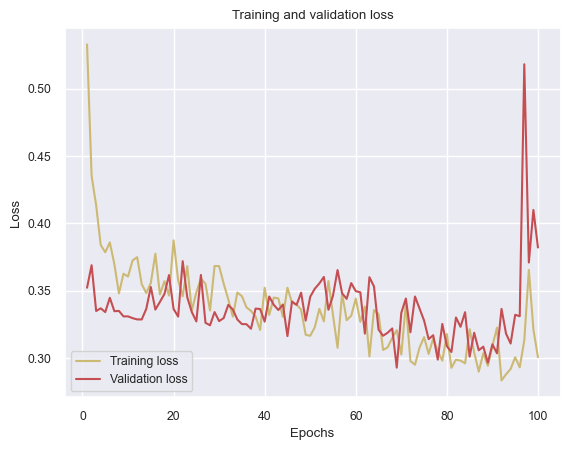

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

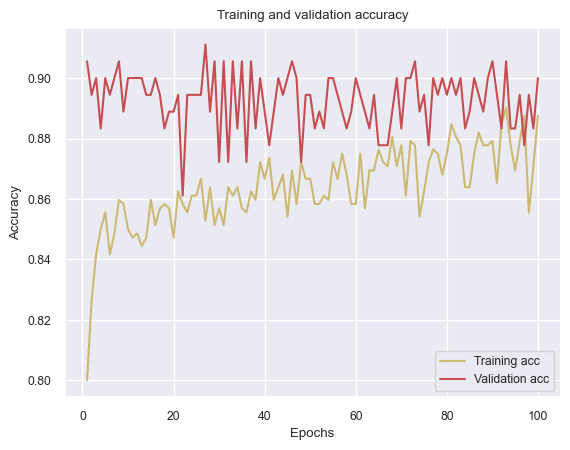

In [87]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [88]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        97
           1       0.89      0.89      0.89        83

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180

[[88  9]
 [ 9 74]]


## LSTM

In [183]:
from keras.layers import LSTM

model=Sequential()
model.add(LSTM(16, activation="relu", input_shape=(7,1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(8, activation="relu"))
model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(Adam(learning_rate=0.01),'binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 7, 16)             1152      
                                                                 
 dropout_60 (Dropout)        (None, 7, 16)             0         
                                                                 
 lstm_57 (LSTM)              (None, 8)                 800       
                                                                 
 dense_67 (Dense)            (None, 4)                 36        
                                                                 
 dropout_61 (Dropout)        (None, 4)                 0         
                                                                 
 dense_68 (Dense)            (None, 2)                 10        
                                                                 
Total params: 1998 (7.80 KB)
Trainable params: 1998 (

In [184]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/100
23/23 [==============================] - 10s 92ms/step - loss: 0.6338 - accuracy: 0.6056 - val_loss: 0.5685 - val_accuracy: 0.8056
Epoch 2/100
23/23 [==============================] - 0s 19ms/step - loss: 0.5663 - accuracy: 0.7264 - val_loss: 0.4875 - val_accuracy: 0.8556
Epoch 3/100
23/23 [==============================] - 0s 19ms/step - loss: 0.5359 - accuracy: 0.7347 - val_loss: 0.4576 - val_accuracy: 0.8278
Epoch 4/100
23/23 [==============================] - 0s 16ms/step - loss: 0.5150 - accuracy: 0.7306 - val_loss: 0.4192 - val_accuracy: 0.8222
Epoch 5/100
23/23 [==============================] - 0s 18ms/step - loss: 0.4993 - accuracy: 0.7292 - val_loss: 0.3850 - val_accuracy: 0.8500
Epoch 6/100
23/23 [==============================] - 1s 23ms/step - loss: 0.4704 - accuracy: 0.7750 - val_loss: 0.3862 - val_accuracy: 0.8611
Epoch 7/100
23/23 [==============================] - 0s 15ms/step - loss: 0.4398 - accuracy: 0.8139 - val_loss: 0.4333 - val_accuracy: 0.8611
Epoch

23/23 [==============================] - 0s 15ms/step - loss: 0.3762 - accuracy: 0.8389 - val_loss: 0.2956 - val_accuracy: 0.8889
Epoch 59/100
23/23 [==============================] - 0s 17ms/step - loss: 0.3886 - accuracy: 0.8278 - val_loss: 0.2933 - val_accuracy: 0.9056
Epoch 60/100
23/23 [==============================] - 0s 13ms/step - loss: 0.3973 - accuracy: 0.8236 - val_loss: 0.3049 - val_accuracy: 0.8778
Epoch 61/100
23/23 [==============================] - 0s 16ms/step - loss: 0.3786 - accuracy: 0.8361 - val_loss: 0.3011 - val_accuracy: 0.9056
Epoch 62/100
23/23 [==============================] - 0s 14ms/step - loss: 0.3841 - accuracy: 0.8389 - val_loss: 0.2871 - val_accuracy: 0.8944
Epoch 63/100
23/23 [==============================] - 0s 13ms/step - loss: 0.3807 - accuracy: 0.8306 - val_loss: 0.2913 - val_accuracy: 0.9056
Epoch 64/100
23/23 [==============================] - 0s 15ms/step - loss: 0.3865 - accuracy: 0.8389 - val_loss: 0.3207 - val_accuracy: 0.8833
Epoch 65/100

In [185]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

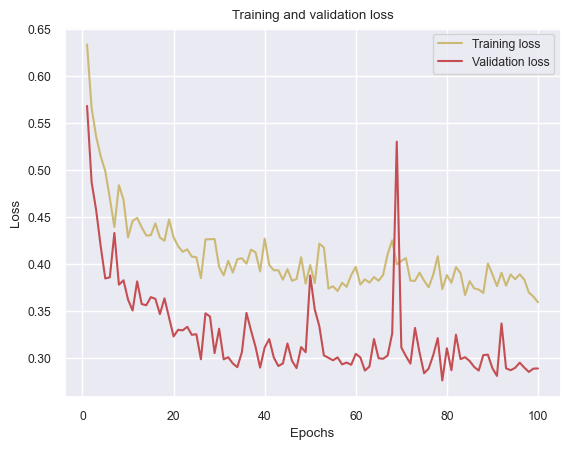

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

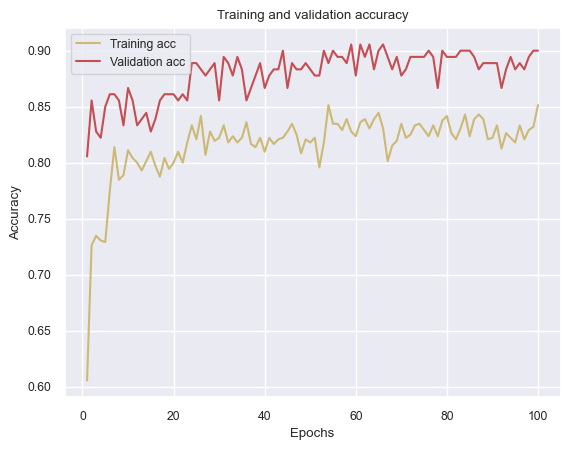

In [187]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [188]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        97
           1       0.88      0.90      0.89        83

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180

[[87 10]
 [ 8 75]]
